In [1]:
import os
import subprocess
# os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

# VDX_dir = '/home/alexi/Documents/ValDX'

VDX_dir = "/home/alexi/Documents/ValDX/"

import sys
sys.path.append(VDX_dir)

from ValDX.VDX_dataclasses import merge_AnalysisData_classes

/home/alexi/Documents/interpretable-hdxer/notebooks/Figure-5_RW_Cluster_size


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
results_dir = "/home/alexi/Documents/interpretable-hdxer/data/fig5/results_R3/"
results_dir = "/home/alexi/Documents/ValDX/results/Sweep-Cluster"
csvs = glob.glob(results_dir + '/**/*.csv', recursive=True)

print(len(csvs))


80


In [3]:

data_frames = []

for csv in csvs:
    data_frames.append(pd.read_csv(csv))

df = pd.concat(data_frames)
df.head()

,time,Type,R,calc_name,mse,name,system,analysis,split_type,protein,name_name,dataset,class
0,0.5,Train,0.383849,train_LXRa_af_small_sweep_0.1_1,NaN,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,NaN,r,sweep,LXRa_af_small_sweep_0.1_RW_bench_r_naive_rando...,train,train_r
1,0.5,Val,0.136899,val_LXRa_af_small_sweep_0.1_1,NaN,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,NaN,r,sweep,LXRa_af_small_sweep_0.1_RW_bench_r_naive_rando...,val,val_r
2,0.5,Train,0.460632,train_LXRa_af_small_sweep_0.1_2,NaN,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,NaN,r,sweep,LXRa_af_small_sweep_0.1_RW_bench_r_naive_rando...,train,train_r
3,0.5,Val,-0.134444,val_LXRa_af_small_sweep_0.1_2,NaN,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,NaN,r,sweep,LXRa_af_small_sweep_0.1_RW_bench_r_naive_rando...,val,val_r
4,0.5,Train,0.423435,train_LXRa_af_small_sweep_0.1_3,NaN,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,LXRa_af_small_sweep_0.1_RW_bench_r_naive_random,NaN,r,sweep,LXRa_af_small_sweep_0.1_RW_bench_r_naive_rando...,train,train_r


In [4]:
# print(df..unique())

In [5]:
# extract protein names from name column

protein_names = ["BPTI", "HOIP", "BRD4", "LXR", "MBP"]

df['protein'] = df['name'].apply(lambda x: x.split('_')[0])


In [6]:
print(df.protein.unique())  



['LXRa' 'MBP' 'BPTI' 'BRD4' 'HOIP']


In [7]:
# extract cluster fraction
fracs = []
for i, row in df.iterrows():
    split = row["system"].split("_")
    frac = split[4][:]
    frac = float(frac)
    fracs.append(frac)



df["frac"] = fracs

df["frames"] = np.array(df.frac * 12700).astype(int)

In [8]:
df.protein.unique()

array(['LXRa', 'MBP', 'BPTI', 'BRD4', 'HOIP'], dtype=object)

In [9]:
# only include df that has non nan mse values
mse_df = df.dropna(subset=["mse"])
val_df = mse_df[mse_df["Type"] == "Val"]

# remove val mse = 0
val_df = val_df[val_df["mse"] != 0]


print(val_df.frames.value_counts())

frames
1270    168
127     168
635     168
12      168
Name: count, dtype: int64


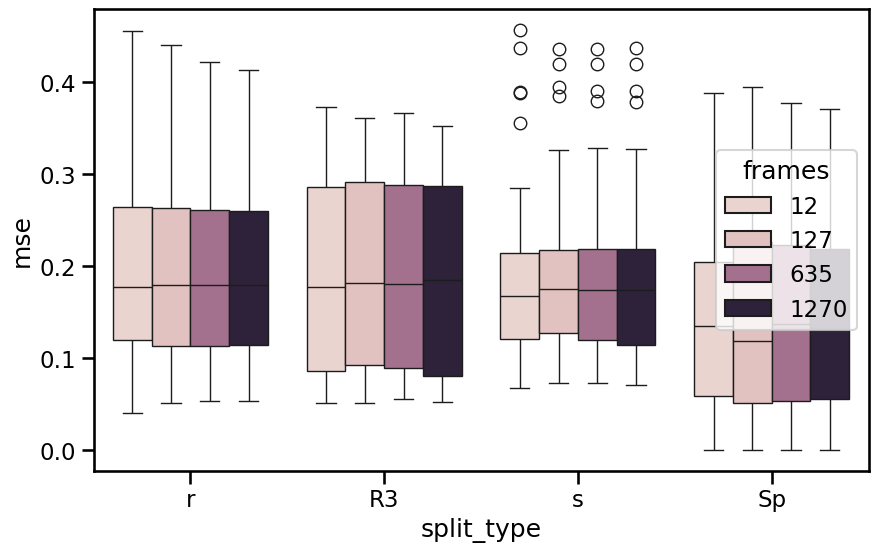

In [10]:

sns.set_context("talk")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.boxplot(data=val_df, x="split_type", y="mse", hue="frames", ax=ax)

# ax.set_yscale("log")

plt.show()


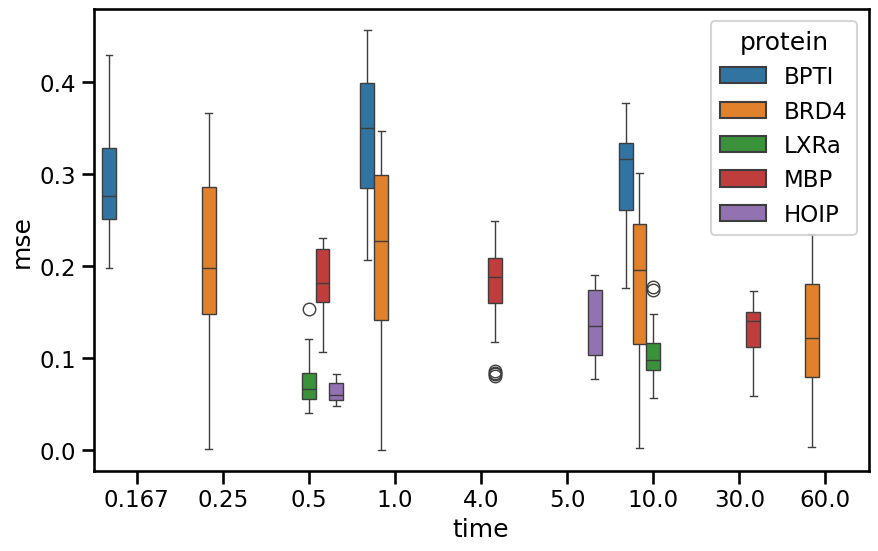

In [11]:

sns.set_context("talk")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.boxplot(data=val_df, x="time", y="mse", hue="protein", ax=ax)

# ax.set_yscale("log")

plt.show()


In [12]:
val_df.split_type.value_counts()

# convert split type string to a number
split_types = ['r', 's', 'R3', 'Sp']
split_type_dict = dict(zip(split_types, range(len(split_types))))

val_df["split_type_num"] = val_df["split_type"].apply(lambda x: int(split_type_dict[x]))

val_df["split_type_num"].value_counts()

split_type_num
0    168
2    168
1    168
3    168
Name: count, dtype: int64

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


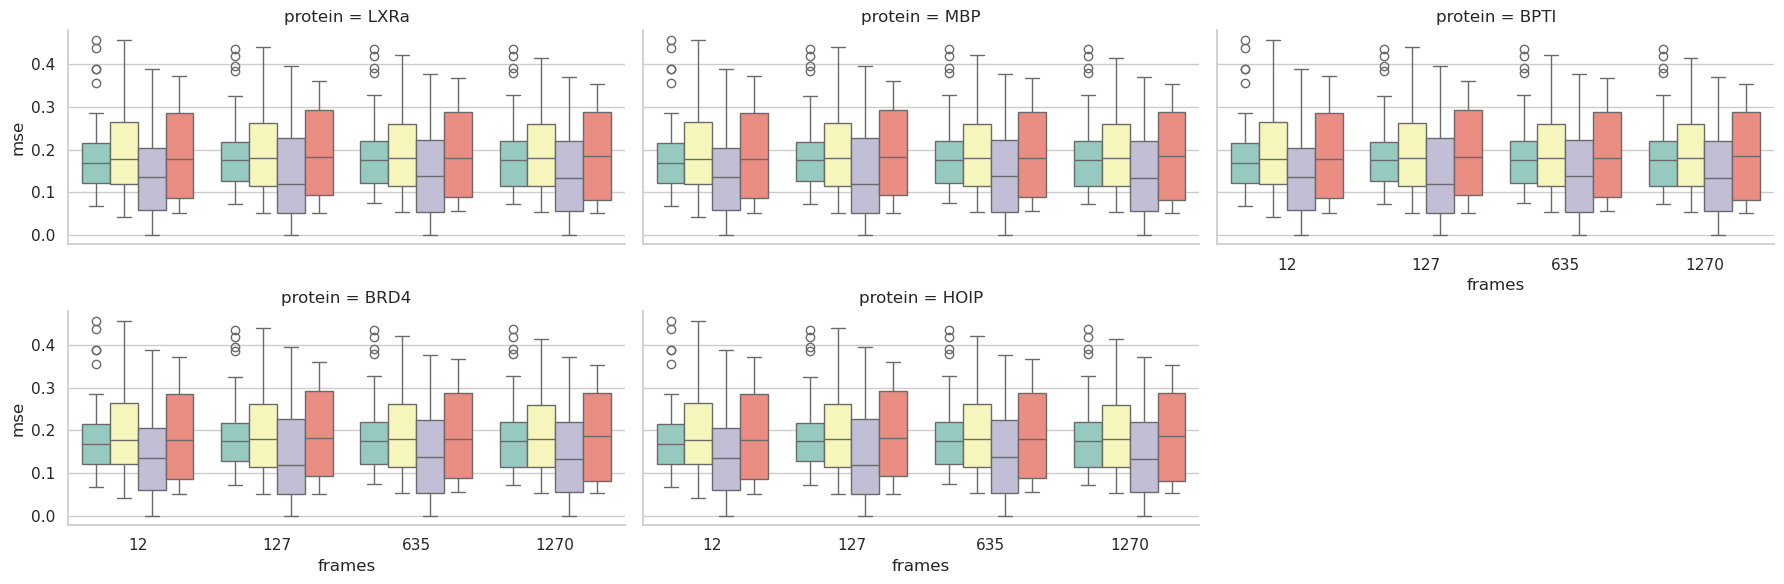

In [15]:


# plot box plot of mse vs frames for each protein

sns.set(style="whitegrid")


# Create a FacetGrid, mapping each 'protein' to a subplot
g = sns.FacetGrid(val_df, col="protein", col_wrap=3, height=3, aspect=2)

# Map the boxplot to the grid
g.map(sns.boxplot, x="frames", y="mse", palette="Set3",hue="split_type")  

plt.show()


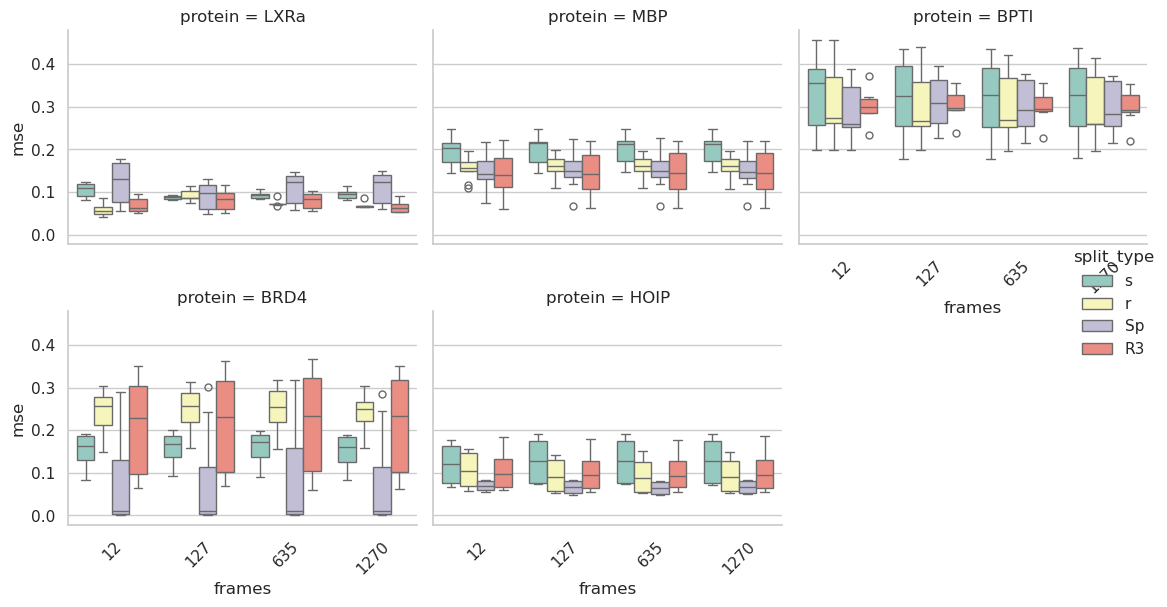

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create a catplot with kind="box"
g = sns.catplot(x="frames", y="mse", col="protein", hue="split_type",
                data=val_df, kind="box", palette="Set3",
                col_wrap=3, height=3, aspect=1.2)

# Adjust the subplot spacing
g.fig.tight_layout(w_pad=1)

# Rotate x-tick labels if needed
g.set_xticklabels(rotation=45)

plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

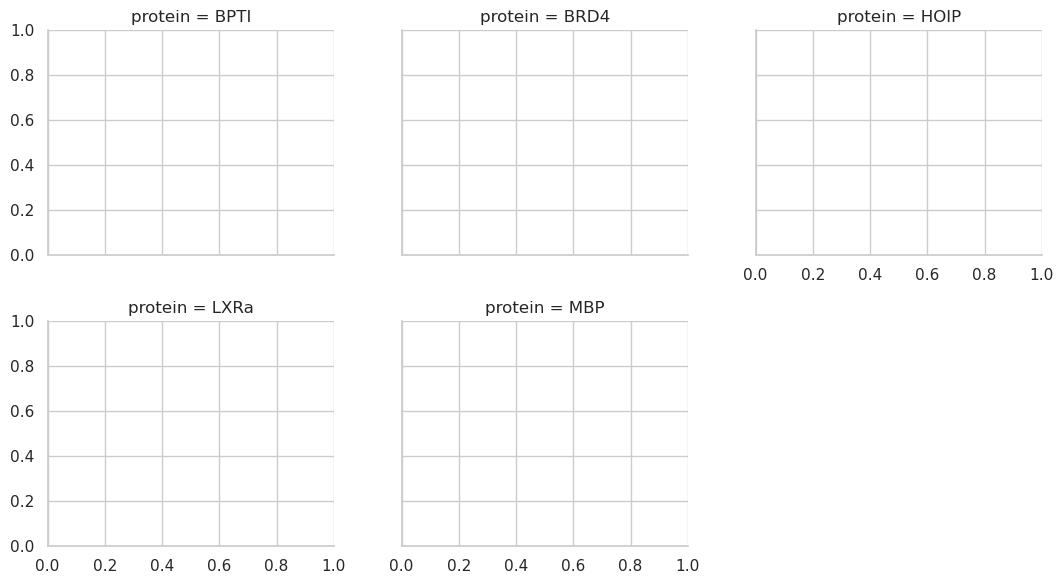

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

sns.set(style="whitegrid")

# Calculate the mean and standard deviation for each group
val_df_stats = val_df.groupby(['protein', 'frames', 'split_type']).agg({'mse': ['mean', 'std']}).reset_index()
val_df_stats.columns = ['protein', 'frames', 'split_type', 'mse_mean', 'mse_std']

# Convert columns to numpy arrays
val_df_stats['frames'] = val_df_stats['frames'].values
val_df_stats['mse_mean'] = val_df_stats['mse_mean'].values
val_df_stats['mse_std'] = val_df_stats['mse_std'].values
# Create a relplot with line plots
g = sns.relplot(x="frames", y="mse_mean", hue="split_type", col="protein",
                data=val_df_stats, kind="line", errorbar="sd", err_style="band",
                palette="Set3", col_wrap=3, height=3, aspect=1.2)

# Adjust the subplot spacing
g.fig.tight_layout(w_pad=1)

# Rotate x-tick labels if needed
g.set_xticklabels(rotation=45)

plt.show()